In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
small_df = df.iloc[:, [0,1,2]]
small_df.head()

,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


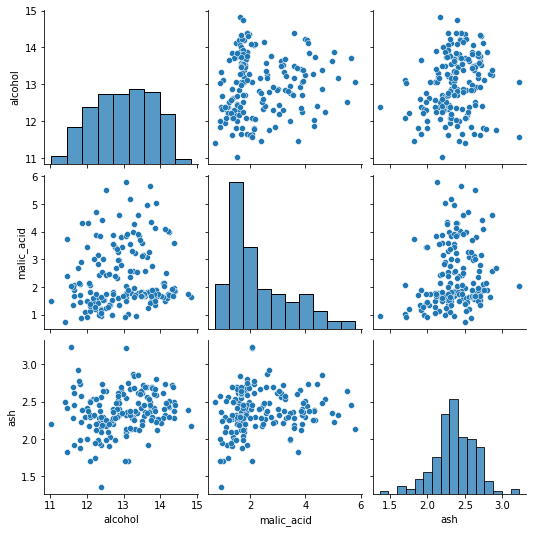

In [5]:
sns.pairplot(small_df)

In [6]:
x = small_df.iloc[:, [0,1]]
x.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [7]:
y = small_df.iloc[:, [2]]
y.head()

,ash
0,2.43
1,2.14
2,2.67
3,2.50
4,2.87


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)
x_train.size

238

In [12]:
y_train.size

119

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
x_train

,alcohol,malic_acid
22,13.71,1.86
146,13.88,5.04
97,12.29,1.41
69,12.21,1.19
167,12.82,3.37
...,...,...
71,13.86,1.51
106,12.25,1.73
14,14.38,1.87
92,12.69,1.53


In [15]:
from sklearn.preprocessing import MinMaxScaler

a = np.arange(0,1500,2)
a

array([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,   20,
         22,   24,   26,   28,   30,   32,   34,   36,   38,   40,   42,
         44,   46,   48,   50,   52,   54,   56,   58,   60,   62,   64,
         66,   68,   70,   72,   74,   76,   78,   80,   82,   84,   86,
         88,   90,   92,   94,   96,   98,  100,  102,  104,  106,  108,
        110,  112,  114,  116,  118,  120,  122,  124,  126,  128,  130,
        132,  134,  136,  138,  140,  142,  144,  146,  148,  150,  152,
        154,  156,  158,  160,  162,  164,  166,  168,  170,  172,  174,
        176,  178,  180,  182,  184,  186,  188,  190,  192,  194,  196,
        198,  200,  202,  204,  206,  208,  210,  212,  214,  216,  218,
        220,  222,  224,  226,  228,  230,  232,  234,  236,  238,  240,
        242,  244,  246,  248,  250,  252,  254,  256,  258,  260,  262,
        264,  266,  268,  270,  272,  274,  276,  278,  280,  282,  284,
        286,  288,  290,  292,  294,  296,  298,  3

In [ ]:
normalizer1 = MinMaxScaler(feature_range = (0,1))
a = np.reshape(a, (-1,1))
a = normalizer1.fit_transform(a)
a

In [19]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

In [ ]:
x_test

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
x_train.shape

(119, 2)

In [26]:
model1 = Sequential([
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1)
])

In [27]:
model1.compile(loss = 'mse', optimizer = 'rmsprop')

In [35]:
model1.fit(x_train, y_train, epochs = 250, batch_size = 11)

Epoch 1/250
11/11 [==============================] - 0s 2ms/step - loss: 0.8876
Epoch 2/250
11/11 [==============================] - 0s 2ms/step - loss: 0.6215
Epoch 3/250
11/11 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 4/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 5/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2089
Epoch 6/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 7/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1485
Epoch 8/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1385
Epoch 9/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 10/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1252
Epoch 11/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 12/250
11/11 [==============================] - 0s 2ms/step - loss: 0.1124
Epoch 13/250
11/11 [=================

In [36]:
y_pred = model1.predict(x_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[2.4454052],
       [2.507389 ],
       [2.3922954],
       [2.4073617],
       [2.3117988],
       [2.4551198],
       [2.4215648],
       [2.4522932],
       [2.3067715],
       [2.4128168],
       [2.4012077],
       [2.4370444],
       [2.4510145],
       [2.399076 ],
       [2.4094794],
       [2.3558123],
       [2.2832155],
       [2.2922523],
       [2.41153  ],
       [2.2993648],
       [2.439093 ],
       [2.354507 ],
       [2.3073385],
       [2.4711692],
       [2.3706253],
       [2.4450123],
       [2.327017 ],
       [2.3128932],
       [2.3114016],
       [2.4028366],
       [2.4307382],
       [2.3243828],
       [2.427721 ],
       [2.4021945],
       [2.4149263],
       [2.427575 ],
       [2.4510996],
       [2.519829 ],
       [2.3090632],
       [2.396105 ],
       [2.3653667],
       [2.305537 ],
       [2.3256896],
       [2.3672268],
       [2.4947424],
       [2.3946197],
       [2.318241 ],
       [2.4493039],
       [2.3284435],
       [2.417828 ],


In [31]:
small_df.shape

(178, 3)

In [32]:
y_pred.shape

(59, 1)

In [37]:
small_df1 = small_df.iloc[0:59, [0,1,2]]
small_df1.head()

,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


In [38]:
small_df1['Predicted Values'] = y_pred
small_df1.head()

,alcohol,malic_acid,ash,Predicted Values
0,14.23,1.71,2.43,2.445405
1,13.20,1.78,2.14,2.507389
2,13.16,2.36,2.67,2.392295
3,14.37,1.95,2.50,2.407362
4,13.24,2.59,2.87,2.311799


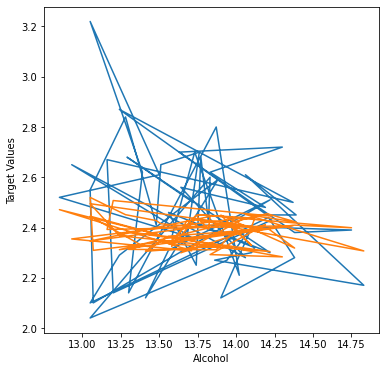

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.plot(small_df1['alcohol'], small_df1['ash'])
plt.plot(small_df1['alcohol'], small_df1['Predicted Values'])
plt.xlabel("Alcohol")
plt.ylabel("Target Values")
plt.show()